<a href="https://colab.research.google.com/github/LRManamperi/Machine-Learning/blob/main/SingersXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas xgboost shap lime matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2e5a2bc4b4069aa4002722ac3f14d9586f0f0a635e90effdd9bd6cddd194f6d2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


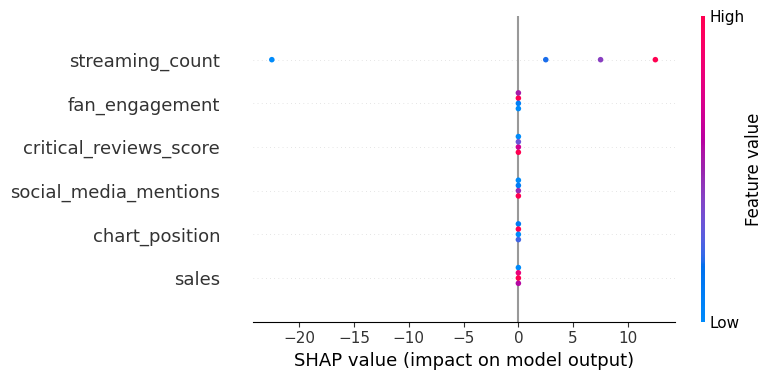

Predictions (Predicted Success Scores for each single):
  single_name  predicted_success
0     Single1          84.999954
1     Single2          94.999016
2     Single3          90.000061
3     Single4          60.000999

The most successful single is: Single2
Predicted Success Metric: 94.99901580810547


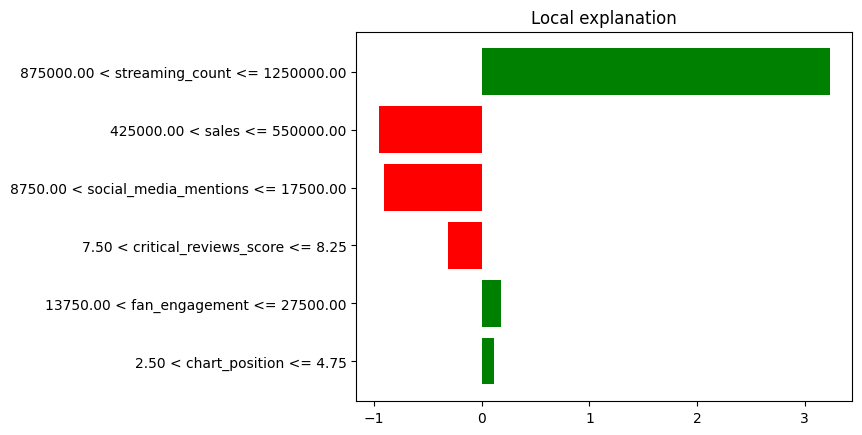

In [2]:
import pandas as pd
import xgboost as xgb
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Sample Data - Replace this with the actual dataset
data = {
    'single_name': ['Single1', 'Single2', 'Single3', 'Single4'],
    'streaming_count': [1000000, 3000000, 1500000, 500000],
    'sales': [500000, 700000, 600000, 200000],
    'chart_position': [3, 1, 2, 10],
    'social_media_mentions': [10000, 50000, 25000, 5000],
    'critical_reviews_score': [8, 9, 7, 6],
    'fan_engagement': [15000, 70000, 40000, 10000],
    # Here, the 'success_metric' is a composite score (you can define this based on what defines success)
    'success_metric': [85, 95, 90, 60]
}

# Load into pandas dataframe
df = pd.DataFrame(data)

# Drop the 'single_name' column as it's non-numeric and not useful for model training
X = df.drop(columns=['single_name', 'success_metric'])

# Target variable: 'success_metric' which we want to predict
y = df['success_metric']

# Split data into training and testing (here it's small, so we're using all data for simplicity)
X_train, X_test, y_train, y_test = X, X, y, y

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to see feature importance
shap.summary_plot(shap_values, X_test)

# Use LIME for local interpretability
explainer_lime = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode="regression", feature_names=X.columns)
lime_explanation = explainer_lime.explain_instance(X_test.iloc[0].values, model.predict)

# LIME Feature Importance Plot
lime_explanation.as_pyplot_figure()

# Show the most successful single based on the model's prediction
predictions = model.predict(X)
df['predicted_success'] = predictions

# Display the predicted success scores
print("Predictions (Predicted Success Scores for each single):")
print(df[['single_name', 'predicted_success']])

# Show the most successful single based on predicted success
most_successful_single = df.loc[df['predicted_success'].idxmax()]
print(f"\nThe most successful single is: {most_successful_single['single_name']}")
print(f"Predicted Success Metric: {most_successful_single['predicted_success']}")

# Show SHAP summary and LIME explanations
plt.show()


In [5]:

import pandas as pd
import xgboost as xgb
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Load your real dataset
df = pd.read_csv('spotify_data.csv')

# Preview the data
print(df.head())

# Drop 'single_name' as it is non-numeric and not useful for training
X = df.drop(columns=['single_name', 'success_metric'])

# Define the target variable ('success_metric' is what we're predicting)
y = df['success_metric']

# Split data into training and testing (for simplicity, using all data for now)
X_train, X_test, y_train, y_test = X, X, y, y

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to see feature importance
shap.summary_plot(shap_values, X_test)

# Use LIME for local interpretability
explainer_lime = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode="regression", feature_names=X.columns)
lime_explanation = explainer_lime.explain_instance(X_test.iloc[0].values, model.predict)

# LIME Feature Importance Plot
lime_explanation.as_pyplot_figure()

# Show the predicted success scores
predictions = model.predict(X)
df['predicted_success'] = predictions

# Display the predicted success scores
print("Predictions (Predicted Success Scores for each single):")
print(df[['single_name', 'predicted_success']])

# Show the most successful single based on predicted success
most_successful_single = df.loc[df['predicted_success'].idxmax()]
print(f"\nThe most successful single is: {most_successful_single['single_name']}")
print(f"Predicted Success Metric: {most_successful_single['predicted_success']}")

# Show SHAP summary and LIME explanations
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'spotify_data.csv'